# Energy Australia Graduate Data Scientist Interview Case Study

Name: Lou Mcarthur

Role: Graduate Data Scientist

Date: 28/03/2023

## Packs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.express as px
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine, inspect
from sqlalchemy import create_engine, text

## EDA and Preprocessing data

In [2]:
BasicAccInfo = df=pd.read_csv('basicAcctInfo.csv')
df=pd.read_csv('basicAcctInfo.csv')
df.head()

,Unnamed: 0,ACCT_ID_M,CUST_ID,STREAMING_SERVICE,ACCT_TYPE,SERVICE_TYPE,CONT_TENURE_MTHS,CUSTOMER_AGE,NUM_CUSTOMER_BILLABLE_ACCOUNTS,CONSUME_SPORTS_SUBSIDISED,TOTAL_DISCOUNT_PERCENT
0,1085553,22929283,14824778,NETFLIX,INDIVIDUAL,SPORTS,21,49.0,3,0,0
1,199699,16923669,8831720,NETFLIX,INDIVIDUAL,SPORTS,67,56.0,1,0,30
2,533407,25124129,19012511,NETFLIX,INDIVIDUAL,ENTERTAINMENT,1,44.0,2,0,0
3,334221,22430133,164226506,STAN,INDIVIDUAL,ENTERTAINMENT,25,33.0,2,0,13
4,1529002,16775871,12959210,NETFLIX,INDIVIDUAL,SPORTS,110,94.0,1,0,0


In [3]:
BasicAccInfo = BasicAccInfo.drop('Unnamed: 0', axis=1)
BasicAccInfo = BasicAccInfo.drop('CUSTOMER_AGE', axis=1)
BasicAccInfo = BasicAccInfo.drop('CUST_ID', axis=1)
BasicAccInfo.dropna(subset=['ACCT_TYPE'], inplace=True)

In [4]:
print(BasicAccInfo.shape)

(49994, 8)


In [5]:
BasicAccInfo.describe()

,ACCT_ID_M,CONT_TENURE_MTHS,NUM_CUSTOMER_BILLABLE_ACCOUNTS,CONSUME_SPORTS_SUBSIDISED,TOTAL_DISCOUNT_PERCENT
count,4.999400e+04,49994.000000,49994.000000,49994.000000,49994.000000
mean,1.625330e+07,63.602252,6.008341,0.109013,10.178941
std,7.788365e+06,47.053778,63.118781,0.311659,11.553364
min,2.930000e+02,0.000000,1.000000,0.000000,0.000000
25%,9.686208e+06,18.000000,1.000000,0.000000,0.000000
50%,1.866764e+07,57.000000,2.000000,0.000000,8.000000
75%,2.322765e+07,111.000000,2.000000,0.000000,18.000000
max,2.562478e+07,170.000000,1784.000000,1.000000,56.000000


In [6]:
cat_cols = ['STREAMING_SERVICE', 'ACCT_TYPE', 'SERVICE_TYPE']
for col in cat_cols:
    print(BasicAccInfo[col].value_counts())

NETFLIX         27304
STAN            18010
DISNEY           2268
AMAZON PRIME     2031
PARAMOUNT         381
Name: STREAMING_SERVICE, dtype: int64
INDIVIDUAL     46886
FAMILY ACCT     3108
Name: ACCT_TYPE, dtype: int64
SPORTS           33203
ENTERTAINMENT    16791
Name: SERVICE_TYPE, dtype: int64


In [7]:
BasicAccInfo.isna().sum()

ACCT_ID_M                         0
STREAMING_SERVICE                 0
ACCT_TYPE                         0
SERVICE_TYPE                      0
CONT_TENURE_MTHS                  0
NUM_CUSTOMER_BILLABLE_ACCOUNTS    0
CONSUME_SPORTS_SUBSIDISED         0
TOTAL_DISCOUNT_PERCENT            0
dtype: int64

In [8]:
num_duplicates = len(BasicAccInfo) - len(BasicAccInfo.drop_duplicates())
print(num_duplicates)

0


In [9]:
BasicAccInfo.head()

,ACCT_ID_M,STREAMING_SERVICE,ACCT_TYPE,SERVICE_TYPE,CONT_TENURE_MTHS,NUM_CUSTOMER_BILLABLE_ACCOUNTS,CONSUME_SPORTS_SUBSIDISED,TOTAL_DISCOUNT_PERCENT
0,22929283,NETFLIX,INDIVIDUAL,SPORTS,21,3,0,0
1,16923669,NETFLIX,INDIVIDUAL,SPORTS,67,1,0,30
2,25124129,NETFLIX,INDIVIDUAL,ENTERTAINMENT,1,2,0,0
3,22430133,STAN,INDIVIDUAL,ENTERTAINMENT,25,2,0,13
4,16775871,NETFLIX,INDIVIDUAL,SPORTS,110,1,0,0


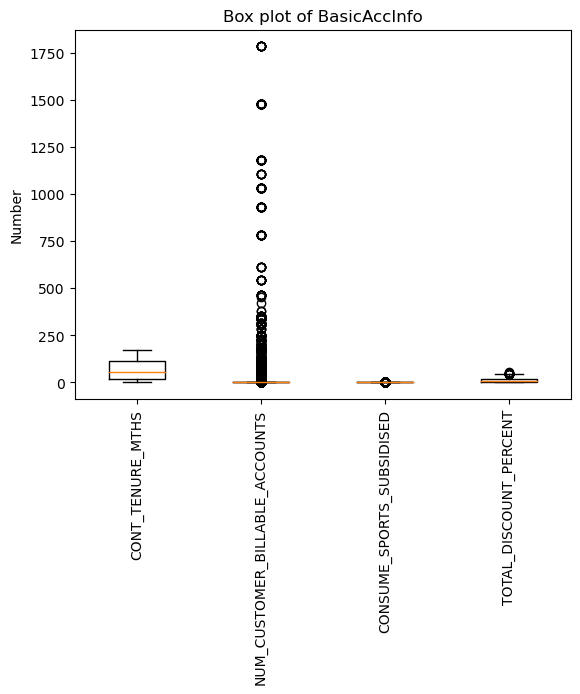

In [10]:
CONT_TENURE_MTHS = BasicAccInfo['CONT_TENURE_MTHS']
NUM_CUSTOMER_BILLABLE_ACCOUNTS = BasicAccInfo['NUM_CUSTOMER_BILLABLE_ACCOUNTS']
CONSUME_SPORTS_SUBSIDISED = BasicAccInfo['CONSUME_SPORTS_SUBSIDISED']
TOTAL_DISCOUNT_PERCENT = BasicAccInfo['TOTAL_DISCOUNT_PERCENT']
plt.boxplot([CONT_TENURE_MTHS, NUM_CUSTOMER_BILLABLE_ACCOUNTS, CONSUME_SPORTS_SUBSIDISED, TOTAL_DISCOUNT_PERCENT])
plt.xticks([1, 2, 3, 4], ['CONT_TENURE_MTHS', 'NUM_CUSTOMER_BILLABLE_ACCOUNTS', 'CONSUME_SPORTS_SUBSIDISED', 'TOTAL_DISCOUNT_PERCENT'], rotation = 90)
plt.ylabel('Number')
plt.title('Box plot of BasicAccInfo')
plt.show()

Number of outliers in column 1: 0
Number of outliers in column 2: 2997
Number of outliers in column 3: 5450
Number of outliers in column 4: 16


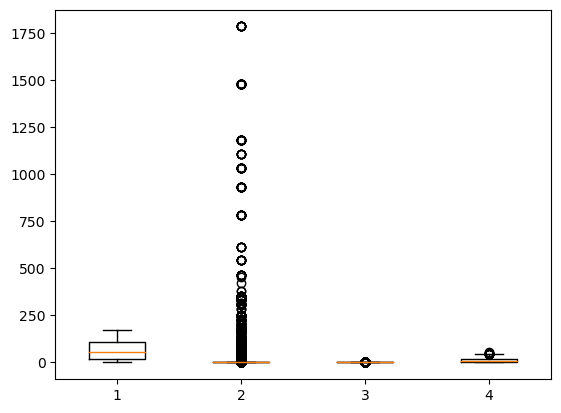

In [11]:
outliers = [item.get_ydata() for item in plt.boxplot([CONT_TENURE_MTHS, NUM_CUSTOMER_BILLABLE_ACCOUNTS, CONSUME_SPORTS_SUBSIDISED, TOTAL_DISCOUNT_PERCENT])['fliers']]
for i, val in enumerate(outliers):
    print(f"Number of outliers in column {i+1}: {len(val)}")

In [12]:
BasicAccInfo.head

<bound method NDFrame.head of        ACCT_ID_M STREAMING_SERVICE    ACCT_TYPE   SERVICE_TYPE  \
0       22929283           NETFLIX   INDIVIDUAL         SPORTS   
1       16923669           NETFLIX   INDIVIDUAL         SPORTS   
2       25124129           NETFLIX   INDIVIDUAL  ENTERTAINMENT   
3       22430133              STAN   INDIVIDUAL  ENTERTAINMENT   
4       16775871           NETFLIX   INDIVIDUAL         SPORTS   
...          ...               ...          ...            ...   
49995   22512663           NETFLIX   INDIVIDUAL         SPORTS   
49996   23489471           NETFLIX   INDIVIDUAL         SPORTS   
49997   24829069      AMAZON PRIME  FAMILY ACCT         SPORTS   
49998    4314363           NETFLIX   INDIVIDUAL         SPORTS   
49999   23468537           NETFLIX   INDIVIDUAL         SPORTS   

       CONT_TENURE_MTHS  NUM_CUSTOMER_BILLABLE_ACCOUNTS  \
0                    21                               3   
1                    67                               1   


In [13]:
print(BasicAccInfo)

       ACCT_ID_M STREAMING_SERVICE    ACCT_TYPE   SERVICE_TYPE  \
0       22929283           NETFLIX   INDIVIDUAL         SPORTS   
1       16923669           NETFLIX   INDIVIDUAL         SPORTS   
2       25124129           NETFLIX   INDIVIDUAL  ENTERTAINMENT   
3       22430133              STAN   INDIVIDUAL  ENTERTAINMENT   
4       16775871           NETFLIX   INDIVIDUAL         SPORTS   
...          ...               ...          ...            ...   
49995   22512663           NETFLIX   INDIVIDUAL         SPORTS   
49996   23489471           NETFLIX   INDIVIDUAL         SPORTS   
49997   24829069      AMAZON PRIME  FAMILY ACCT         SPORTS   
49998    4314363           NETFLIX   INDIVIDUAL         SPORTS   
49999   23468537           NETFLIX   INDIVIDUAL         SPORTS   

       CONT_TENURE_MTHS  NUM_CUSTOMER_BILLABLE_ACCOUNTS  \
0                    21                               3   
1                    67                               1   
2                     1       

In [14]:
df=pd.read_csv('churninfo.csv')
ChurnInfo = df=pd.read_csv('churninfo.csv')
ChurnInfo.head()

,Unnamed: 0,ACCT_ID_M,CHURN_DATE,CHURNED,CHURNED_30,CHURNED_90
0,1085553,22929283,NaN,0,0,0
1,199699,16923669,NaN,0,0,0
2,533407,25124129,NaN,0,0,0
3,334221,22430133,NaN,0,0,0
4,1529002,16775871,NaN,0,0,0


In [15]:
ChurnInfo = ChurnInfo.drop('Unnamed: 0', axis=1)
ChurnInfo = ChurnInfo.drop('CHURN_DATE', axis=1)

In [16]:
print(ChurnInfo.shape)

(48000, 4)


In [17]:
ChurnInfo.describe()

,ACCT_ID_M,CHURNED,CHURNED_30,CHURNED_90
count,4.800000e+04,48000.000000,48000.000000,48000.000000
mean,1.625938e+07,0.008229,0.000375,0.008229
std,7.788903e+06,0.090342,0.019361,0.090342
min,2.930000e+02,0.000000,0.000000,0.000000
25%,9.685114e+06,0.000000,0.000000,0.000000
50%,1.867918e+07,0.000000,0.000000,0.000000
75%,2.322796e+07,0.000000,0.000000,0.000000
max,2.562478e+07,1.000000,1.000000,1.000000


In [18]:
ChurnInfo.isna().sum()

ACCT_ID_M     0
CHURNED       0
CHURNED_30    0
CHURNED_90    0
dtype: int64

In [19]:
num_duplicates = len(ChurnInfo) - len(ChurnInfo.drop_duplicates())
print(num_duplicates)

0


In [20]:
ChurnInfo.head()

,ACCT_ID_M,CHURNED,CHURNED_30,CHURNED_90
0,22929283,0,0,0
1,16923669,0,0,0
2,25124129,0,0,0
3,22430133,0,0,0
4,16775871,0,0,0


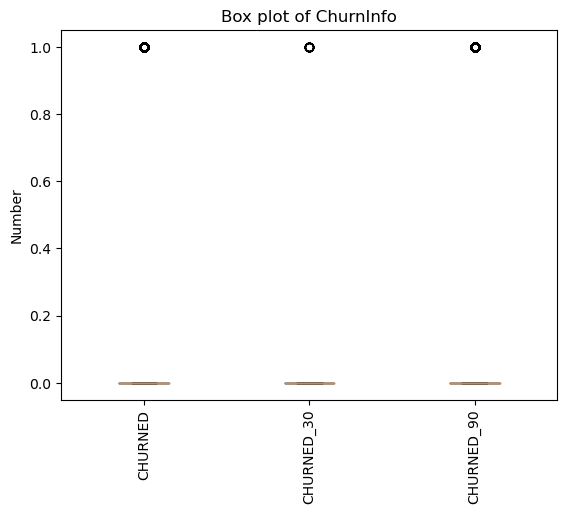

In [21]:
CHURNED = ChurnInfo['CHURNED']
CHURNED_30 = ChurnInfo['CHURNED_30']
CHURNED_90 = ChurnInfo['CHURNED_90']
plt.boxplot([CHURNED, CHURNED_30, CHURNED_90])
plt.xticks([1, 2, 3], ['CHURNED', 'CHURNED_30', 'CHURNED_90'], rotation = 90)
plt.ylabel('Number')
plt.title('Box plot of ChurnInfo')
plt.show()

In [22]:
InteractionInfo = df=pd.read_csv('interactioninfo.csv')
df=pd.read_csv('interactioninfo.csv')
InteractionInfo.head()

,Unnamed: 0,ACCT_ID_M,DAYS_LAST_LOGIN,NUM_LOGINS_6M,NUM_WKDAY_LOGIN_6M,NUM_WKEND_LOGIN_6M,Measures.Call_Duration_mean,Measures.Call_Duration_min,Measures.Call_Duration_max,DEPT_Retention Inbound,DEPT_Retention Outbound,MAX_RING_DURATION_6M,MAX_TALK_DURATION_3M,NUM_INTERACTION_3M,EMAIL_T1_ISP_FLG,EMAIL_T2_ISP_FLG,EMAIL_WEBMAIL_FLG
0,199699,16923669,1749.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
1,533407,25124129,2.0,4,4,0,NaN,NaN,NaN,NaN,NaN,4.0,2409.0,2,0,0,1
2,334221,22430133,15.0,3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,1
3,1942451,19428623,98.0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
4,2271418,22043987,841.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0


In [23]:
InteractionInfo = InteractionInfo.drop(['Unnamed: 0', 'EMAIL_T1_ISP_FLG', 'EMAIL_T2_ISP_FLG', 'EMAIL_WEBMAIL_FLG', 'Measures.Call_Duration_mean', 'Measures.Call_Duration_min', 'Measures.Call_Duration_max', 'NUM_WKDAY_LOGIN_6M', 'NUM_WKEND_LOGIN_6M', 'DAYS_LAST_LOGIN', 'NUM_INTERACTION_3M', 'MAX_RING_DURATION_6M', 'MAX_TALK_DURATION_3M', 'NUM_LOGINS_6M'], axis=1)
InteractionInfo.head()

,ACCT_ID_M,DEPT_Retention Inbound,DEPT_Retention Outbound
0,16923669,NaN,NaN
1,25124129,NaN,NaN
2,22430133,NaN,NaN
3,19428623,NaN,NaN
4,22043987,NaN,NaN


In [24]:
InteractionInfo = InteractionInfo.rename(columns={'DEPT_Retention Inbound': 'DEPT_Retention_Inbound', 
                        'DEPT_Retention Outbound': 'DEPT_Retention_Outbound'})
InteractionInfo.head()

,ACCT_ID_M,DEPT_Retention_Inbound,DEPT_Retention_Outbound
0,16923669,NaN,NaN
1,25124129,NaN,NaN
2,22430133,NaN,NaN
3,19428623,NaN,NaN
4,22043987,NaN,NaN


In [25]:
print(InteractionInfo.shape)

(45000, 3)


In [26]:
print(InteractionInfo.dtypes)

ACCT_ID_M                    int64
DEPT_Retention_Inbound     float64
DEPT_Retention_Outbound    float64
dtype: object


In [27]:
InteractionInfo.describe()

,ACCT_ID_M,DEPT_Retention_Inbound,DEPT_Retention_Outbound
count,4.500000e+04,8504.000000,8504.000000
mean,1.626581e+07,0.018932,0.145108
std,7.786142e+06,0.214151,0.458169
min,2.930000e+02,0.000000,0.000000
25%,9.709866e+06,0.000000,0.000000
50%,1.867774e+07,0.000000,0.000000
75%,2.323138e+07,0.000000,0.000000
max,2.562478e+07,11.000000,10.000000


In [28]:
InteractionInfo.isna().sum()

ACCT_ID_M                      0
DEPT_Retention_Inbound     36496
DEPT_Retention_Outbound    36496
dtype: int64

In [29]:
num_duplicates = len(InteractionInfo) - len(InteractionInfo.drop_duplicates())
print(num_duplicates)

0


In [30]:
print(InteractionInfo['DEPT_Retention_Inbound'].value_counts())

0.0     8395
1.0       79
2.0       19
3.0        9
6.0        1
11.0       1
Name: DEPT_Retention_Inbound, dtype: int64


In [31]:
InteractionInfo.dropna(subset=['DEPT_Retention_Inbound'], inplace=True)

In [32]:
InteractionInfo.describe()

,ACCT_ID_M,DEPT_Retention_Inbound,DEPT_Retention_Outbound
count,8.504000e+03,8504.000000,8504.000000
mean,1.965527e+07,0.018932,0.145108
std,6.522770e+06,0.214151,0.458169
min,3.585500e+04,0.000000,0.000000
25%,1.612805e+07,0.000000,0.000000
50%,2.265528e+07,0.000000,0.000000
75%,2.458723e+07,0.000000,0.000000
max,2.562478e+07,11.000000,10.000000


In [33]:
print(InteractionInfo.shape)

(8504, 3)


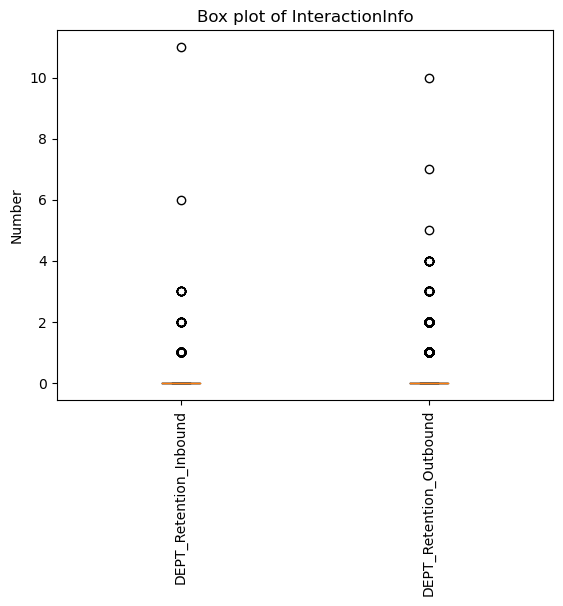

In [34]:
DEPT_Retention_Inbound = InteractionInfo['DEPT_Retention_Inbound']
DEPT_Retention_Outbound = InteractionInfo['DEPT_Retention_Outbound']
plt.boxplot([DEPT_Retention_Inbound, DEPT_Retention_Outbound])
plt.xticks([1, 2], ['DEPT_Retention_Inbound', 'DEPT_Retention_Outbound'], rotation = 90)
plt.ylabel('Number')
plt.title('Box plot of InteractionInfo')
plt.show()

Number of outliers in column 1: 109
Number of outliers in column 2: 987


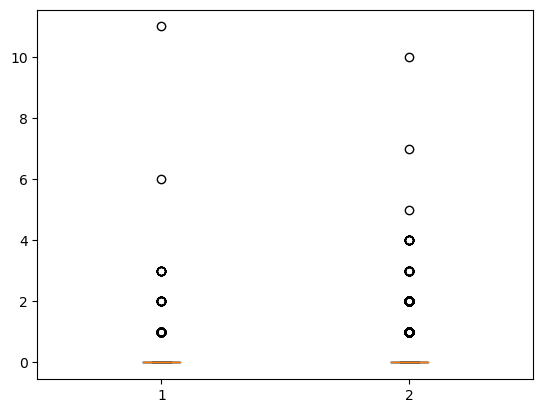

In [35]:
outliers = [item.get_ydata() for item in plt.boxplot([DEPT_Retention_Inbound, DEPT_Retention_Outbound])['fliers']]
for i, val in enumerate(outliers):
    print(f"Number of outliers in column {i+1}: {len(val)}")

In [36]:
PaymentInfo = df=pd.read_csv('paymentinfo.csv')
df=pd.read_csv('paymentinfo.csv')
df.head()

,Unnamed: 0,ACCT_ID_M,DIRECT_DEBIT_FLAG,NUM_PAYMENT_CHALLENGED_6M,NUM_REFUNDS_3M,CHANNEL_PAY_APOST_12M,CHANNEL_PAY_BPAY_12M,CHANNEL_PAY_BPOINT_12M,CHANNEL_PAY_DD_SAVING_12M,CHANNEL_PAY_DD_CREDIT_12M
0,1085553,22929283,0,0,0,3,0,1,0,0
1,199699,16923669,0,0,0,0,5,0,0,0
2,533407,25124129,0,0,0,0,0,0,0,0
3,334221,22430133,1,0,0,0,0,0,2,0
4,1529002,16775871,1,0,0,0,0,0,4,0


In [37]:
PaymentInfo = PaymentInfo.drop('Unnamed: 0', axis=1)
PaymentInfo.head()

,ACCT_ID_M,DIRECT_DEBIT_FLAG,NUM_PAYMENT_CHALLENGED_6M,NUM_REFUNDS_3M,CHANNEL_PAY_APOST_12M,CHANNEL_PAY_BPAY_12M,CHANNEL_PAY_BPOINT_12M,CHANNEL_PAY_DD_SAVING_12M,CHANNEL_PAY_DD_CREDIT_12M
0,22929283,0,0,0,3,0,1,0,0
1,16923669,0,0,0,0,5,0,0,0
2,25124129,0,0,0,0,0,0,0,0
3,22430133,1,0,0,0,0,0,2,0
4,16775871,1,0,0,0,0,0,4,0


In [38]:
print(PaymentInfo.shape)

(35000, 9)


In [39]:
PaymentInfo.describe()

,ACCT_ID_M,DIRECT_DEBIT_FLAG,NUM_PAYMENT_CHALLENGED_6M,NUM_REFUNDS_3M,CHANNEL_PAY_APOST_12M,CHANNEL_PAY_BPAY_12M,CHANNEL_PAY_BPOINT_12M,CHANNEL_PAY_DD_SAVING_12M,CHANNEL_PAY_DD_CREDIT_12M
count,3.500000e+04,35000.000000,35000.000000,35000.0,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000
mean,1.623447e+07,0.233543,0.000086,0.0,0.588171,2.540286,0.887514,0.940771,0.457000
std,7.807165e+06,0.423091,0.009258,0.0,2.368263,6.290157,2.149370,4.078539,2.112451
min,2.930000e+02,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.629554e+06,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.865487e+07,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.323424e+07,0.000000,0.000000,0.0,0.000000,4.000000,1.000000,0.000000,0.000000
max,2.562478e+07,1.000000,1.000000,0.0,51.000000,125.000000,55.000000,53.000000,52.000000


In [40]:
PaymentInfo.isna().sum()

ACCT_ID_M                    0
DIRECT_DEBIT_FLAG            0
NUM_PAYMENT_CHALLENGED_6M    0
NUM_REFUNDS_3M               0
CHANNEL_PAY_APOST_12M        0
CHANNEL_PAY_BPAY_12M         0
CHANNEL_PAY_BPOINT_12M       0
CHANNEL_PAY_DD_SAVING_12M    0
CHANNEL_PAY_DD_CREDIT_12M    0
dtype: int64

In [41]:
num_duplicates = len(PaymentInfo) - len(PaymentInfo.drop_duplicates())
print(num_duplicates)

0


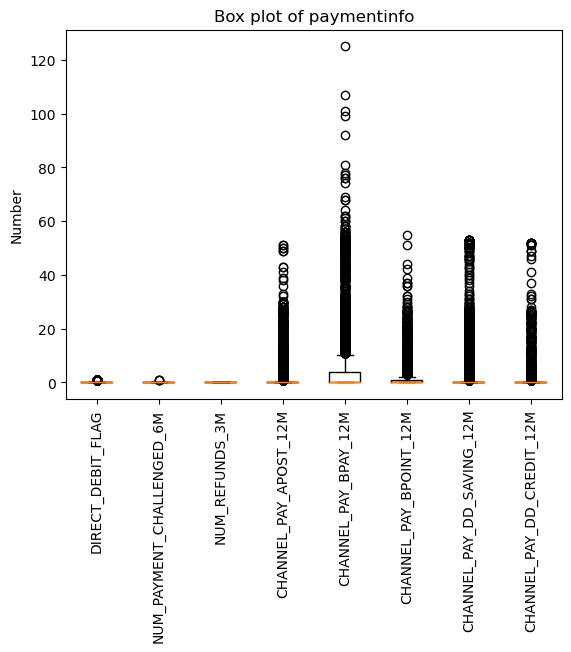

In [42]:
DIRECT_DEBIT_FLAG = PaymentInfo['DIRECT_DEBIT_FLAG']
NUM_PAYMENT_CHALLENGED_6M = PaymentInfo['NUM_PAYMENT_CHALLENGED_6M']
NUM_REFUNDS_3M = PaymentInfo['NUM_REFUNDS_3M']
CHANNEL_PAY_APOST_12M = PaymentInfo['CHANNEL_PAY_APOST_12M']
CHANNEL_PAY_BPAY_12M = PaymentInfo['CHANNEL_PAY_BPAY_12M']
CHANNEL_PAY_BPOINT_12M = PaymentInfo['CHANNEL_PAY_BPOINT_12M']
CHANNEL_PAY_DD_SAVING_12M = PaymentInfo['CHANNEL_PAY_DD_SAVING_12M']
CHANNEL_PAY_DD_CREDIT_12M = PaymentInfo['CHANNEL_PAY_DD_CREDIT_12M']
plt.boxplot([DIRECT_DEBIT_FLAG, NUM_PAYMENT_CHALLENGED_6M, NUM_REFUNDS_3M, CHANNEL_PAY_APOST_12M, CHANNEL_PAY_BPAY_12M,CHANNEL_PAY_BPOINT_12M, CHANNEL_PAY_DD_SAVING_12M, CHANNEL_PAY_DD_CREDIT_12M])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['DIRECT_DEBIT_FLAG', 'NUM_PAYMENT_CHALLENGED_6M', 'NUM_REFUNDS_3M', 'CHANNEL_PAY_APOST_12M', 'CHANNEL_PAY_BPAY_12M', 'CHANNEL_PAY_BPOINT_12M', 'CHANNEL_PAY_DD_SAVING_12M', 'CHANNEL_PAY_DD_CREDIT_12M'], rotation = 90)
plt.ylabel('Number')
plt.title('Box plot of paymentinfo')
plt.show()

Number of outliers in column 1: 8174
Number of outliers in column 2: 3
Number of outliers in column 3: 0
Number of outliers in column 4: 4433
Number of outliers in column 5: 1544
Number of outliers in column 6: 5325
Number of outliers in column 7: 4393
Number of outliers in column 8: 3298


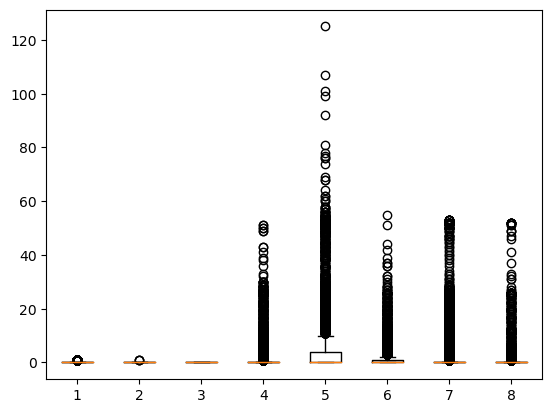

In [43]:
outliers = [item.get_ydata() for item in plt.boxplot([DIRECT_DEBIT_FLAG, NUM_PAYMENT_CHALLENGED_6M, NUM_REFUNDS_3M, CHANNEL_PAY_APOST_12M, CHANNEL_PAY_BPAY_12M,CHANNEL_PAY_BPOINT_12M, CHANNEL_PAY_DD_SAVING_12M, CHANNEL_PAY_DD_CREDIT_12M])['fliers']]
for i, val in enumerate(outliers):
    print(f"Number of outliers in column {i+1}: {len(val)}")

In [44]:
PremiseInfo = df=pd.read_csv('premiseinfo.csv')
df=pd.read_csv('premiseinfo.csv')
df.head()

,Unnamed: 0,ACCT_ID_M,PREMISE_POSTCODE
0,1085553,22929283,2154
1,199699,16923669,2020
2,1942451,19428623,2250
3,2271418,22043987,2321
4,643687,24457111,2113


In [45]:
PremiseInfo.isna().sum()

Unnamed: 0          0
ACCT_ID_M           0
PREMISE_POSTCODE    0
dtype: int64

In [46]:
num_duplicates = len(PremiseInfo) - len(PremiseInfo.drop_duplicates())
print(num_duplicates)

0


In [47]:
PremiseInfo = PremiseInfo.drop('Unnamed: 0', axis=1)

In [48]:
PremiseInfo.isna().sum()

ACCT_ID_M           0
PREMISE_POSTCODE    0
dtype: int64

In [49]:
PremiseInfo.describe()

,ACCT_ID_M,PREMISE_POSTCODE
count,3.000000e+04,30000.000000
mean,1.626808e+07,2847.992867
std,7.769378e+06,809.863680
min,5.110000e+02,2000.000000
25%,9.732900e+06,2165.000000
50%,1.864944e+07,2594.000000
75%,2.320933e+07,3212.000000
max,2.561974e+07,5710.000000


In [50]:
print(PremiseInfo['PREMISE_POSTCODE'].value_counts())

2250    232
2000    215
3029    209
3030    204
3977    182
       ... 
3428      1
5213      1
2864      1
5204      1
5632      1
Name: PREMISE_POSTCODE, Length: 1406, dtype: int64


In [51]:
PremiseInfo.shape

(30000, 2)

In [52]:
SignupSalesInfo = df=pd.read_csv('signupsalesinfo.csv')
df=pd.read_csv('signupsalesinfo.csv')
df.head()

,Unnamed: 0,ACCT_ID_M,OFFER_CHANNEL_CODE,ACQ_BROKER_EVER,ACQ_EXTERNAL_EVER,ACQ_INTERNAL_EVER,DEPT_Sales Chat
0,199699,16923669,CST,0,0,1,NaN
1,334221,22430133,NEWCON,0,1,1,NaN
2,1529002,16775871,UNK,0,0,1,NaN
3,2271418,22043987,ONLINETPU,0,0,1,NaN
4,643687,24457111,DIGITAL,0,0,1,NaN


In [53]:
SignupSalesInfo = SignupSalesInfo.drop('Unnamed: 0', axis=1)

In [54]:
SignupSalesInfo.head

<bound method NDFrame.head of        ACCT_ID_M OFFER_CHANNEL_CODE  ACQ_BROKER_EVER  ACQ_EXTERNAL_EVER  \
0       16923669                CST                0                  0   
1       22430133             NEWCON                0                  1   
2       16775871                UNK                0                  0   
3       22043987          ONLINETPU                0                  0   
4       24457111            DIGITAL                0                  0   
...          ...                ...              ...                ...   
32745    3588567                CST                0                  1   
32746   15171859            DATACOM                0                  0   
32747   23489471               NBSC                0                  0   
32748   24829069               NBSC                0                  0   
32749   23468537          ONLINETPU                0                  0   

       ACQ_INTERNAL_EVER  DEPT_Sales Chat  
0                      1 

In [55]:
SignupSalesInfo.describe()

,ACCT_ID_M,ACQ_BROKER_EVER,ACQ_EXTERNAL_EVER,ACQ_INTERNAL_EVER,DEPT_Sales Chat
count,3.275000e+04,32750.000000,32750.000000,32750.000000,6226.000000
mean,1.627124e+07,0.000977,0.178168,0.795511,0.009155
std,7.787638e+06,0.031244,0.382660,0.403334,0.120560
min,5.110000e+02,0.000000,0.000000,0.000000,0.000000
25%,9.708410e+06,0.000000,0.000000,1.000000,0.000000
50%,1.870097e+07,0.000000,0.000000,1.000000,0.000000
75%,2.322906e+07,0.000000,0.000000,1.000000,0.000000
max,2.561919e+07,1.000000,1.000000,1.000000,4.000000


In [56]:
SignupSalesInfo.shape

(32750, 6)

In [57]:
print(SignupSalesInfo['OFFER_CHANNEL_CODE'].value_counts())

NBSC          10705
ONLINETPU      7757
DIGITAL        4375
CIC_SAL        1686
NEWCON         1492
CST            1115
NAV             683
NBSCADMIN       429
BEC             357
DATACOM         312
CONNECTNOW      201
ONLINE          158
CIC_SRV         131
UNK              46
AEGIS            10
Name: OFFER_CHANNEL_CODE, dtype: int64


In [58]:
print(SignupSalesInfo['DEPT_Sales Chat'].value_counts())

0.0    6182
1.0      34
2.0       8
4.0       1
3.0       1
Name: DEPT_Sales Chat, dtype: int64


In [59]:
SignupSalesInfo.isna().sum()

ACCT_ID_M                 0
OFFER_CHANNEL_CODE     3293
ACQ_BROKER_EVER           0
ACQ_EXTERNAL_EVER         0
ACQ_INTERNAL_EVER         0
DEPT_Sales Chat       26524
dtype: int64

In [60]:
num_duplicates = len(SignupSalesInfo) - len(SignupSalesInfo.drop_duplicates())
print(num_duplicates)

0


In [61]:
SignupSalesInfo['OFFER_CHANNEL_CODE'] = SignupSalesInfo['OFFER_CHANNEL_CODE'].fillna('NAN')

In [62]:
SignupSalesInfo.isna().sum()

ACCT_ID_M                 0
OFFER_CHANNEL_CODE        0
ACQ_BROKER_EVER           0
ACQ_EXTERNAL_EVER         0
ACQ_INTERNAL_EVER         0
DEPT_Sales Chat       26524
dtype: int64

In [63]:
SignupSalesInfo.shape

(32750, 6)

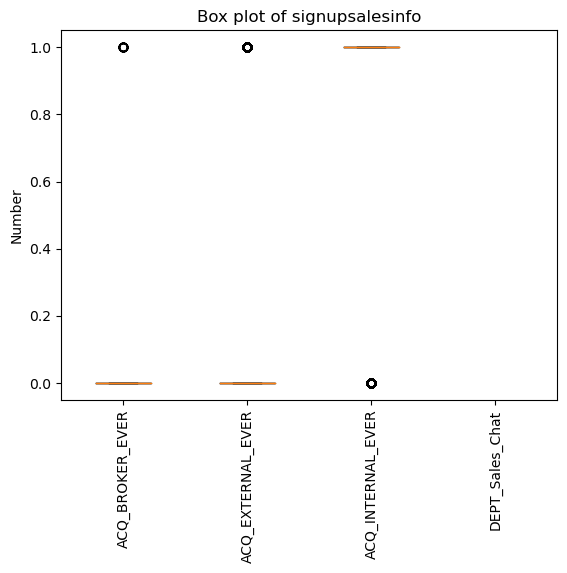

In [64]:
ACQ_BROKER_EVER = SignupSalesInfo['ACQ_BROKER_EVER']
ACQ_EXTERNAL_EVER = SignupSalesInfo['ACQ_EXTERNAL_EVER']
ACQ_INTERNAL_EVER = SignupSalesInfo['ACQ_INTERNAL_EVER']
DEPT_Sales_Chat = SignupSalesInfo['DEPT_Sales Chat']
plt.boxplot([ACQ_BROKER_EVER, ACQ_EXTERNAL_EVER, ACQ_INTERNAL_EVER, DEPT_Sales_Chat])
plt.xticks([1, 2, 3, 4], ['ACQ_BROKER_EVER', 'ACQ_EXTERNAL_EVER', 'ACQ_INTERNAL_EVER', 'DEPT_Sales_Chat'], rotation = 90)
plt.ylabel('Number')
plt.title('Box plot of signupsalesinfo')
plt.show()

In [65]:
ValueInfo = df=pd.read_csv('valueinfo.csv')
df=pd.read_csv('valueinfo.csv')
df.head()

,Unnamed: 0,ACCT_ID_M,CVM_TOTAL_BILL_GROSS,CVM_AN_PERIOD_GM,CVM_REV_BILLED_DAYS,CVM_HOURS_WATCHED_TOTAL,CVM_SPORTS_HOURS_WATCHED_TOTAL,CVM_REV_LOYALTY_R_R_AMT
0,1085553,22929283,NaN,NaN,NaN,NaN,NaN,NaN
1,199699,16923669,635.771967,38.51004,353.0,2484.545455,NaN,NaN
2,533407,25124129,NaN,NaN,NaN,NaN,NaN,NaN
3,334221,22430133,NaN,NaN,NaN,NaN,NaN,NaN
4,1529002,16775871,193.281667,115.97231,352.0,694.000000,NaN,NaN


In [66]:
ValueInfo = ValueInfo.drop('Unnamed: 0', axis=1)
ValueInfo= ValueInfo.drop('CVM_REV_LOYALTY_R_R_AMT', axis=1)
ValueInfo = ValueInfo.drop('CVM_SPORTS_HOURS_WATCHED_TOTAL', axis=1)

In [67]:
num_duplicates = len(ValueInfo) - len(ValueInfo.drop_duplicates())
print(num_duplicates)

0


In [68]:
ValueInfo.shape

(50000, 5)

In [69]:
ValueInfo.describe()

,ACCT_ID_M,CVM_TOTAL_BILL_GROSS,CVM_AN_PERIOD_GM,CVM_REV_BILLED_DAYS,CVM_HOURS_WATCHED_TOTAL
count,5.000000e+04,34950.000000,34950.000000,34950.000000,34950.000000
mean,1.625436e+07,309.014422,105.035186,334.550558,3421.076371
std,7.788503e+06,355.409977,233.225832,61.804499,9936.214570
min,2.930000e+02,-112.676033,-5675.537880,35.000000,-1696.586945
25%,9.686709e+06,154.347717,56.895158,339.000000,645.500000
50%,1.866936e+07,241.816417,91.867825,354.000000,1226.000000
75%,2.322833e+07,363.349733,144.229990,365.000000,2970.363636
max,2.562478e+07,14268.660833,11317.058100,373.000000,601041.454545


In [70]:
ValueInfo.isna().sum()

ACCT_ID_M                      0
CVM_TOTAL_BILL_GROSS       15050
CVM_AN_PERIOD_GM           15050
CVM_REV_BILLED_DAYS        15050
CVM_HOURS_WATCHED_TOTAL    15050
dtype: int64

In [71]:
ValueInfo.dropna(subset=['CVM_TOTAL_BILL_GROSS'], inplace=True)

In [72]:
ValueInfo.isna().sum()

ACCT_ID_M                  0
CVM_TOTAL_BILL_GROSS       0
CVM_AN_PERIOD_GM           0
CVM_REV_BILLED_DAYS        0
CVM_HOURS_WATCHED_TOTAL    0
dtype: int64

In [73]:
print(ValueInfo.shape)

(34950, 5)


## Database

In [74]:
engine = create_engine('sqlite:///StreamingAnalysis.db')

BasicAccInfo.to_sql('BasicAccInfo', engine, if_exists='replace', index=False)
ChurnInfo.to_sql('ChurnInfo', engine, if_exists='replace', index=False)
InteractionInfo.to_sql('InteractionInfo', engine, if_exists='replace', index=False)
PaymentInfo.to_sql('PaymentInfo', engine, if_exists='replace', index=False)
PremiseInfo.to_sql('PremiseInfo', engine, if_exists='replace', index=False)
SignupSalesInfo.to_sql('SignupSalesInfo', engine, if_exists='replace', index=False)
ValueInfo.to_sql('ValueInfo', engine, if_exists='replace', index=False)

with engine.connect() as connection:
    connection.execute(text('''
        CREATE TABLE IF NOT EXISTS ChurnInfo (
            ACC_ID_M INTEGER PRIMARY KEY,
            FOREIGN KEY (ACC_ID_M) REFERENCES BasicAccInfo(ACC_ID_M)
        )
    '''))
    
    connection.execute(text('''
        CREATE TABLE IF NOT EXISTS InteractionInfo (
            ACC_ID_M INTEGER PRIMARY KEY,
            FOREIGN KEY (ACC_ID_M) REFERENCES BasicAccInfo(ACC_ID_M)
        )
    '''))
    
    connection.execute(text('''
        CREATE TABLE IF NOT EXISTS PaymentInfo (
            ACC_ID_M INTEGER PRIMARY KEY,
            FOREIGN KEY (ACC_ID_M) REFERENCES BasicAccInfo(ACC_ID_M)
        )
    '''))
    
    connection.execute(text('''
        CREATE TABLE IF NOT EXISTS PremiseInfo (
            ACC_ID_M INTEGER PRIMARY KEY,
            FOREIGN KEY (ACC_ID_M) REFERENCES BasicAccInfo(ACC_ID_M)
        )
    '''))
    
    connection.execute(text('''
        CREATE TABLE IF NOT EXISTS SignupSalesInfo (
            ACC_ID_M INTEGER PRIMARY KEY,
            FOREIGN KEY (ACC_ID_M) REFERENCES BasicAccInfo(ACC_ID_M)
        )
    '''))
    
    connection.execute(text('''
        CREATE TABLE IF NOT EXISTS ValueInfo (
            ACC_ID_M INTEGER PRIMARY KEY,
            FOREIGN KEY (ACC_ID_M) REFERENCES BasicAccInfo(ACC_ID_M)
        )
    '''))
    
    result = connection.execute(text('SELECT * FROM BasicAccInfo'))
    data = result.fetchall()
    df = pd.DataFrame(data, columns=result.keys())
    print(df.head())

   ACCT_ID_M STREAMING_SERVICE   ACCT_TYPE   SERVICE_TYPE  CONT_TENURE_MTHS  \
0   22929283           NETFLIX  INDIVIDUAL         SPORTS                21   
1   16923669           NETFLIX  INDIVIDUAL         SPORTS                67   
2   25124129           NETFLIX  INDIVIDUAL  ENTERTAINMENT                 1   
3   22430133              STAN  INDIVIDUAL  ENTERTAINMENT                25   
4   16775871           NETFLIX  INDIVIDUAL         SPORTS               110   

   NUM_CUSTOMER_BILLABLE_ACCOUNTS  CONSUME_SPORTS_SUBSIDISED  \
0                               3                          0   
1                               1                          0   
2                               2                          0   
3                               2                          0   
4                               1                          0   

   TOTAL_DISCOUNT_PERCENT  
0                       0  
1                      30  
2                       0  
3                      13  


## Analysis

### Customer Retention Analysis

In [75]:
engine = create_engine('sqlite:///StreamingAnalysis.db')

connection = engine.connect()

churn_sql = text('SELECT COUNT(DISTINCT ACCT_ID_M) as churned_customers FROM ChurnInfo WHERE CHURNED = "1"')
non_churn_sql = text('SELECT COUNT(DISTINCT ACCT_ID_M) as churned_customers FROM ChurnInfo WHERE CHURNED = "0"')
churn30_sql = text('SELECT COUNT(DISTINCT ACCT_ID_M) as churned30_customers FROM ChurnInfo WHERE CHURNED_30 = "1"')
churn90_sql = text('SELECT COUNT(DISTINCT ACCT_ID_M) as churned90_customers FROM ChurnInfo WHERE CHURNED_90 = "1"')
retention_sql = text('SELECT STREAMING_SERVICE, COUNT(DISTINCT BasicAccInfo.ACCT_ID_M) as retained_customers FROM BasicAccInfo JOIN ChurnInfo ON BasicAccInfo.ACCT_ID_M = ChurnInfo.ACCT_ID_M WHERE CHURNED = "1" GROUP BY STREAMING_SERVICE')
non_retention_sql = text('SELECT STREAMING_SERVICE, COUNT(DISTINCT BasicAccInfo.ACCT_ID_M) as retained_customers FROM BasicAccInfo JOIN ChurnInfo ON BasicAccInfo.ACCT_ID_M = ChurnInfo.ACCT_ID_M WHERE CHURNED = "0" GROUP BY STREAMING_SERVICE')
retention30_sql = text('SELECT STREAMING_SERVICE, COUNT(DISTINCT BasicAccInfo.ACCT_ID_M) as retained_customers FROM BasicAccInfo JOIN ChurnInfo ON BasicAccInfo.ACCT_ID_M = ChurnInfo.ACCT_ID_M WHERE CHURNED_30 = "1" GROUP BY STREAMING_SERVICE')
retention90_sql = text('SELECT STREAMING_SERVICE, COUNT(DISTINCT BasicAccInfo.ACCT_ID_M) as retained_customers FROM BasicAccInfo JOIN ChurnInfo ON BasicAccInfo.ACCT_ID_M = ChurnInfo.ACCT_ID_M WHERE CHURNED_90 = "1" GROUP BY STREAMING_SERVICE')
interaction_sql = text('SELECT BasicAccInfo.STREAMING_SERVICE, \
                               SUM(CASE WHEN InteractionInfo.DEPT_Retention_Inbound IS NOT NULL THEN 1 ELSE 0 END) as retention_inbound_interactions, \
                               SUM(CASE WHEN InteractionInfo.DEPT_Retention_Outbound IS NOT NULL THEN 1 ELSE 0 END) as retention_outbound_interactions \
                        FROM BasicAccInfo \
                        JOIN ChurnInfo ON BasicAccInfo.ACCT_ID_M = ChurnInfo.ACCT_ID_M \
                        JOIN InteractionInfo ON BasicAccInfo.ACCT_ID_M = InteractionInfo.ACCT_ID_M \
                        GROUP BY BasicAccInfo.STREAMING_SERVICE')

churn_df = pd.read_sql(churn_sql, connection)
non_churn_df = pd.read_sql(non_churn_sql, connection)
churn30_df = pd.read_sql(churn30_sql, connection)
churn90_df = pd.read_sql(churn90_sql, connection)
retention_df = pd.read_sql(retention_sql, connection)
non_retention_df = pd.read_sql(non_retention_sql, connection)
retention30_df = pd.read_sql(retention30_sql, connection)
retention90_df = pd.read_sql(retention90_sql, connection)
interaction_df = pd.read_sql(interaction_sql, connection)

connection.close()

print("Number of churned customers:", churn_df.iloc[0]['churned_customers'])

Number of churned customers: 395


In [76]:
print("Number of non-churned customers days:", non_churn_df.iloc[0]['churned_customers'])

Number of non-churned customers days: 47605


In [77]:
print("Number of churned customers in last 30 days:", churn30_df.iloc[0]['churned30_customers'])

Number of churned customers in last 30 days: 18


In [78]:
print("Number of churned customers in last 90 days:", churn90_df.iloc[0]['churned90_customers'])

Number of churned customers in last 90 days: 395


In [79]:
print(retention_df)

  STREAMING_SERVICE  retained_customers
0      AMAZON PRIME                  24
1            DISNEY                  19
2           NETFLIX                 198
3         PARAMOUNT                   6
4              STAN                 147


In [80]:
print(non_retention_df)

  STREAMING_SERVICE  retained_customers
0      AMAZON PRIME                1925
1            DISNEY                2141
2           NETFLIX               26017
3         PARAMOUNT                 357
4              STAN               17160


In [81]:
print(retention30_df)

  STREAMING_SERVICE  retained_customers
0           NETFLIX                  10
1              STAN                   8


In [82]:
print(retention90_df)

  STREAMING_SERVICE  retained_customers
0      AMAZON PRIME                  24
1            DISNEY                  19
2           NETFLIX                 198
3         PARAMOUNT                   6
4              STAN                 147


In [83]:
print(interaction_df)

  STREAMING_SERVICE  retention_inbound_interactions  \
0      AMAZON PRIME                             359   
1            DISNEY                             512   
2           NETFLIX                            4558   
3         PARAMOUNT                              61   
4              STAN                            2667   

   retention_outbound_interactions  
0                              359  
1                              512  
2                             4558  
3                               61  
4                             2667  


In [84]:
engine = create_engine('sqlite:///StreamingAnalysis.db')
connection = engine.connect()

merged_data_sql = text('''
    SELECT
        b.ACCT_ID_M,
        b.STREAMING_SERVICE,
        c.CHURNED
    FROM BasicAccInfo b
    LEFT JOIN ChurnInfo c ON b.ACCT_ID_M = c.ACCT_ID_M
''')
merged_data_df = pd.read_sql_query(merged_data_sql, connection)
merged_data_df.to_sql('merged_data_temp', connection, if_exists='replace', index=False)

churn_summary_sql = text('''
    SELECT
        STREAMING_SERVICE,
        COUNT(*) AS total_customers,
        SUM(CASE WHEN CHURNED = 0 THEN 1 ELSE 0 END) AS retained_customers
    FROM merged_data_temp
    GROUP BY STREAMING_SERVICE
''')
churn_summary_df = pd.read_sql_query(churn_summary_sql, connection)

retention_rate_sql = text('''
    SELECT
        STREAMING_SERVICE,
        SUM(CASE WHEN CHURNED = 0 THEN 1 ELSE 0 END) AS retained_customers,
        COUNT(*) AS total_customers,
        (SUM(CASE WHEN CHURNED = 0 THEN 1 ELSE 0 END) * 1.0 / COUNT(*)) * 100 AS retention_rate
    FROM merged_data_temp
    GROUP BY STREAMING_SERVICE
''')
retention_rate_df = pd.read_sql_query(retention_rate_sql, connection)

connection.close()

print(retention_rate_df)

  STREAMING_SERVICE  retained_customers  total_customers  retention_rate
0      AMAZON PRIME                1925             2031       94.780896
1            DISNEY                2141             2268       94.400353
2           NETFLIX               26017            27304       95.286405
3         PARAMOUNT                 357              381       93.700787
4              STAN               17160            18010       95.280400


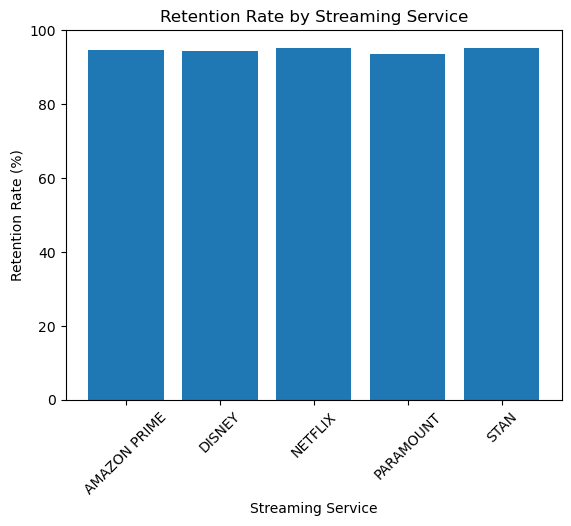

In [85]:
import matplotlib.pyplot as plt

plt.bar(retention_rate_df['STREAMING_SERVICE'], retention_rate_df['retention_rate'])
plt.title('Retention Rate by Streaming Service')
plt.xlabel('Streaming Service')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.show()

### Customer profitability

In [86]:
engine = create_engine('sqlite:///StreamingAnalysis.db')

connection = engine.connect()

query = '''
    SELECT b.ACCT_ID_M, 
           b.SERVICE_TYPE, 
           b.STREAMING_SERVICE,
           b.CONT_TENURE_MTHS, 
           b.NUM_CUSTOMER_BILLABLE_ACCOUNTS, 
           b.CONSUME_SPORTS_SUBSIDISED, 
           b.TOTAL_DISCOUNT_PERCENT,
           v.CVM_TOTAL_BILL_GROSS,
           v.CVM_AN_PERIOD_GM, 
           v.CVM_REV_BILLED_DAYS, 
           v.CVM_HOURS_WATCHED_TOTAL,
           (v.CVM_TOTAL_BILL_GROSS * (1 - b.TOTAL_DISCOUNT_PERCENT / 100)) AS PROFITABILITY
    FROM BasicAccInfo b
    JOIN ValueInfo v
    ON b.ACCT_ID_M = v.ACCT_ID_M
'''

with engine.connect() as connection:
    result = connection.execute(text(query))

columns = ['ACCT_ID_M', 'SERVICE_TYPE', 'b.STREAMING_SERVICE', 'CONT_TENURE_MTHS', 'NUM_CUSTOMER_BILLABLE_ACCOUNTS', 'CONSUME_SPORTS_SUBSIDISED', 'TOTAL_DISCOUNT_PERCENT', 'CVM_TOTAL_BILL_GROSS', 'CVM_AN_PERIOD_GM', 'CVM_REV_BILLED_DAYS', 'CVM_HOURS_WATCHED_TOTAL', 'PROFITABILITY']
profitability_df = pd.DataFrame(result, columns = columns)

print(profitability_df)


       ACCT_ID_M   SERVICE_TYPE b.STREAMING_SERVICE  CONT_TENURE_MTHS  \
0       16923669         SPORTS             NETFLIX                67   
1       16775871         SPORTS             NETFLIX               110   
2       19428623  ENTERTAINMENT             NETFLIX                49   
3       22329655         SPORTS                STAN                25   
4       22043987         SPORTS             NETFLIX                28   
...          ...            ...                 ...               ...   
34945    8702147  ENTERTAINMENT                STAN               147   
34946    3588567         SPORTS              DISNEY                69   
34947   15171859         SPORTS        AMAZON PRIME               141   
34948   22512663         SPORTS             NETFLIX                24   
34949    4314363         SPORTS             NETFLIX               110   

       NUM_CUSTOMER_BILLABLE_ACCOUNTS  CONSUME_SPORTS_SUBSIDISED  \
0                                   1                  

In [87]:
average_profitability = profitability_df['PROFITABILITY'].mean()
std_dev_profitability = profitability_df['PROFITABILITY'].std()

print(f"Average Profitability: {average_profitability:.2f}")
print(f"Standard Deviation of Profitability: {std_dev_profitability:.2f}")

Average Profitability: 309.01
Standard Deviation of Profitability: 355.41


In [88]:
segmented_profitability = profitability_df.groupby('CONT_TENURE_MTHS')['PROFITABILITY'].agg(['mean', 'std'])
segmented_profitability.reset_index(inplace=True)
segmented_profitability.columns = ['CONT_TENURE_MTHS', 'AVG_PROFITABILITY', 'STD_PROFITABILITY']

print(segmented_profitability)

     CONT_TENURE_MTHS  AVG_PROFITABILITY  STD_PROFITABILITY
0                  20         296.314667         199.086174
1                  21         149.254067         102.299727
2                  22         200.267497         229.854024
3                  23         220.052728         251.588916
4                  24         249.260062         297.738770
..                ...                ...                ...
125               145         313.656834         215.370982
126               146         325.475469         325.588344
127               147         321.669442         329.855733
128               148         306.913460         280.661365
129               170         485.736917                NaN

[130 rows x 3 columns]


In [89]:
segmented_profitability = profitability_df.groupby('SERVICE_TYPE')['PROFITABILITY'].agg(['mean', 'std'])
segmented_profitability.reset_index(inplace=True)
segmented_profitability.columns = ['SERVICE_TYPE', 'AVG_PROFITABILITY', 'STD_PROFITABILITY']

print(segmented_profitability)

    SERVICE_TYPE  AVG_PROFITABILITY  STD_PROFITABILITY
0  ENTERTAINMENT         221.544868         338.133357
1         SPORTS         352.963529         355.760941


In [90]:
query = '''
    SELECT b.ACCT_ID_M, 
           b.STREAMING_SERVICE,
           b.TOTAL_DISCOUNT_PERCENT,
           v.CVM_TOTAL_BILL_GROSS,
           (v.CVM_TOTAL_BILL_GROSS * (1 - b.TOTAL_DISCOUNT_PERCENT / 100)) AS PROFITABILITY
    FROM BasicAccInfo b
    JOIN ValueInfo v
    ON b.ACCT_ID_M = v.ACCT_ID_M
'''

with engine.connect() as connection:
    result = connection.execute(text(query))

columns = ['ACCT_ID_M', 'STREAMING_SERVICE', 'TOTAL_DISCOUNT_PERCENT', 'CVM_TOTAL_BILL_GROSS', 'PROFITABILITY']
profitability_df = pd.DataFrame(result, columns=columns)

In [91]:
segmented_profitability = profitability_df.groupby('STREAMING_SERVICE')['PROFITABILITY'].agg(['mean', 'std'])
segmented_profitability.reset_index(inplace=True)
segmented_profitability.columns = ['STREAMING_SERVICE', 'AVG_PROFITABILITY', 'STD_PROFITABILITY']

print(segmented_profitability)

  STREAMING_SERVICE  AVG_PROFITABILITY  STD_PROFITABILITY
0      AMAZON PRIME         286.412304         288.971612
1            DISNEY         355.794543         294.821723
2           NETFLIX         302.505289         373.430059
3              STAN         316.385618         339.452211


In [92]:
services = BasicAccInfo['STREAMING_SERVICE'].unique()

print(services)

['NETFLIX' 'STAN' 'PARAMOUNT' 'DISNEY' 'AMAZON PRIME']


#### Profitablity Correlation Matrix 

In [93]:
conn = sqlite3.connect('StreamingAnalysis.db')

BasicAccInfo = pd.read_sql_query("SELECT * FROM BasicAccInfo", conn)
ChurnInfo = pd.read_sql_query("SELECT * FROM ChurnInfo", conn)
InteractionInfo = pd.read_sql_query("SELECT * FROM InteractionInfo", conn)
PaymentInfo = pd.read_sql_query("SELECT * FROM PaymentInfo", conn)
PremiseInfo = pd.read_sql_query("SELECT * FROM PremiseInfo", conn)
SignupSalesInfo = pd.read_sql_query("SELECT * FROM SignupSalesInfo", conn)
ValueInfo = pd.read_sql_query("SELECT * FROM ValueInfo", conn)

conn.close()

merged_df = (
    BasicAccInfo
    .merge(ChurnInfo, on="ACCT_ID_M", how="left")
    .merge(InteractionInfo, on="ACCT_ID_M", how="left")
    .merge(PaymentInfo, on="ACCT_ID_M", how="left")
    .merge(PremiseInfo, on="ACCT_ID_M", how="left")
    .merge(SignupSalesInfo, on="ACCT_ID_M", how="left")
    .merge(ValueInfo, on="ACCT_ID_M", how="left")
)

merged_df['profitability'] = merged_df['CVM_TOTAL_BILL_GROSS'] * (1 - merged_df['TOTAL_DISCOUNT_PERCENT'] / 100)
correlation_matrix = merged_df.corr()
profitability_correlation = correlation_matrix['profitability']
sorted_profitability_correlation = profitability_correlation.sort_values(ascending=False)

print(sorted_profitability_correlation)

profitability                     1.000000
CVM_TOTAL_BILL_GROSS              0.980639
CVM_HOURS_WATCHED_TOTAL           0.510651
CVM_AN_PERIOD_GM                  0.469920
NUM_CUSTOMER_BILLABLE_ACCOUNTS    0.097910
CONSUME_SPORTS_SUBSIDISED         0.072928
CHANNEL_PAY_BPAY_12M              0.066678
CVM_REV_BILLED_DAYS               0.053314
CONT_TENURE_MTHS                  0.041879
ACQ_BROKER_EVER                   0.013471
CHANNEL_PAY_DD_SAVING_12M         0.012628
ACQ_EXTERNAL_EVER                 0.012604
DEPT_Retention_Inbound            0.011642
CHURNED_90                        0.006187
CHURNED                           0.006187
PREMISE_POSTCODE                  0.001286
CHURNED_30                       -0.001180
NUM_PAYMENT_CHALLENGED_6M        -0.002977
DEPT_Sales Chat                  -0.003247
CHANNEL_PAY_BPOINT_12M           -0.008229
CHANNEL_PAY_DD_CREDIT_12M        -0.009865
DEPT_Retention_Outbound          -0.015943
ACQ_INTERNAL_EVER                -0.021006
DIRECT_DEBI

C:\Users\Lewis McArthur\AppData\Local\Temp\ipykernel_564\3029101922.py:24: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



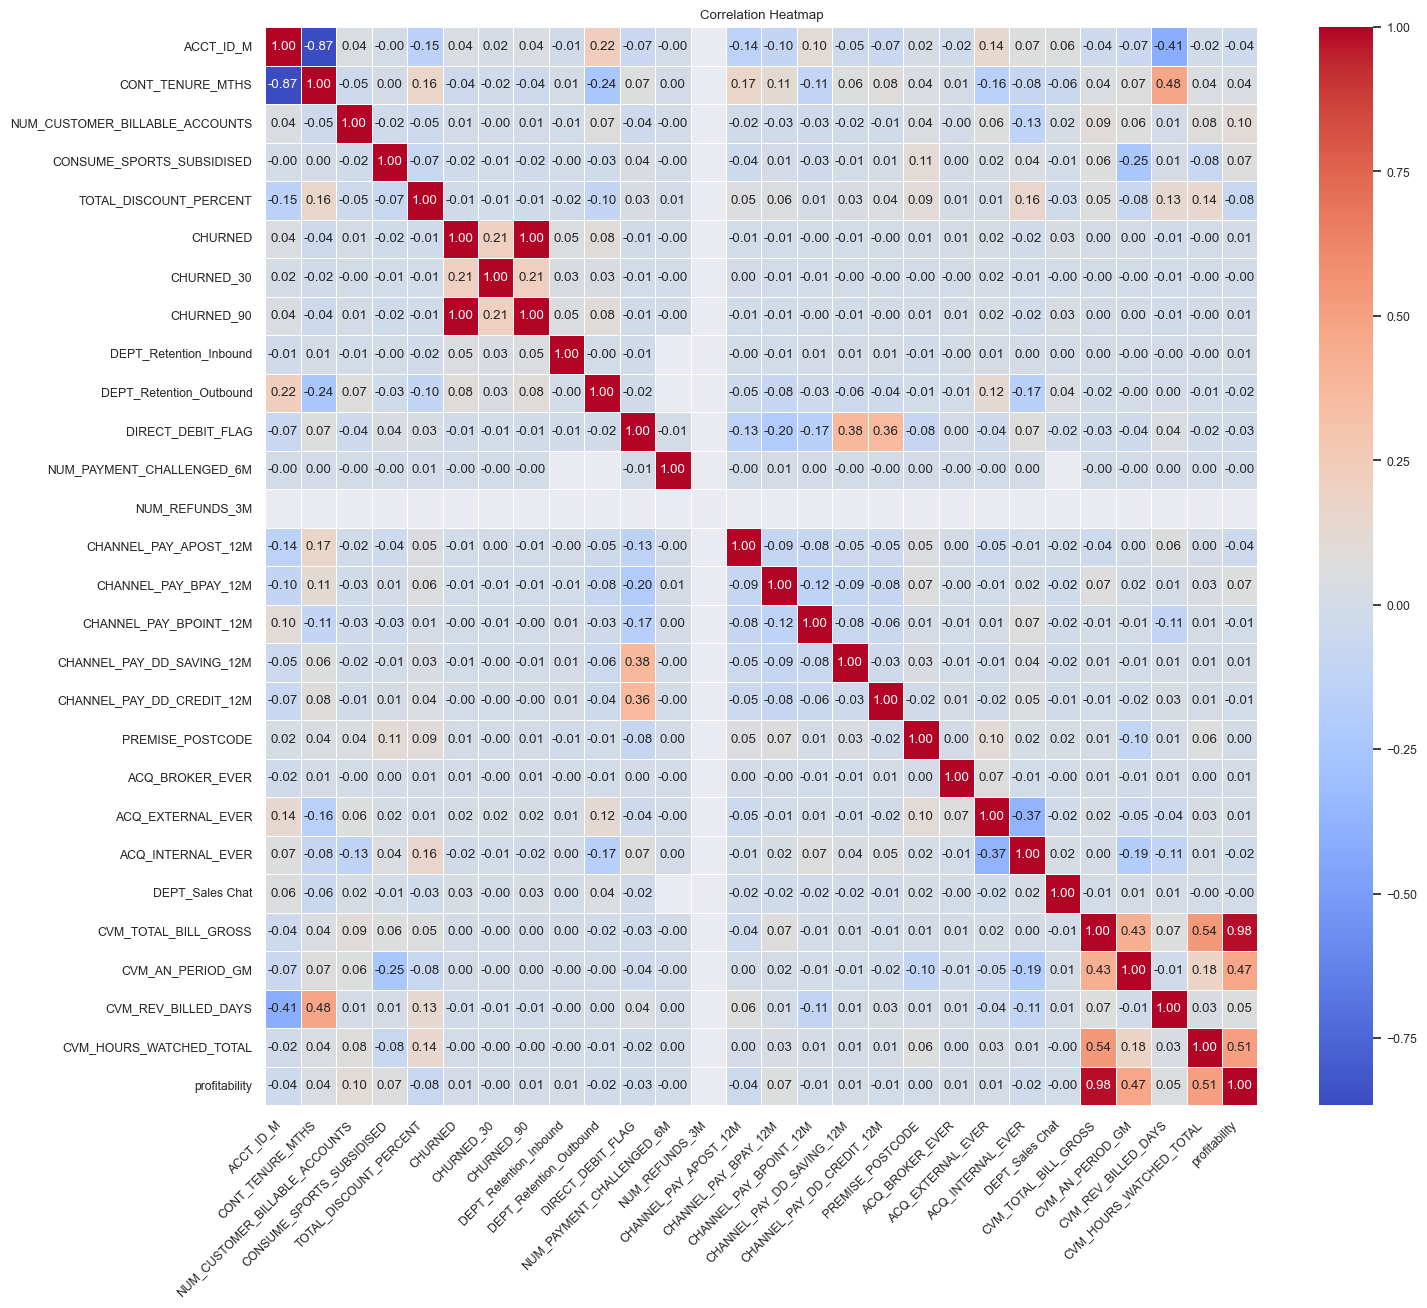

In [94]:
corr_matrix = merged_df.corr(numeric_only=True)
plt.figure(figsize=(16, 14))
sns.set(font_scale=0.8)
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.xticks(rotation=45, ha="right")
plt.title("Correlation Heatmap")
plt.show()

## Insights |

### Number of users with mutliple billing accounts per streaming service 


In [103]:
query = '''
    WITH total_customers AS (
        SELECT COUNT(*) as total FROM BasicAccInfo
    )
    SELECT STREAMING_SERVICE, 
           COUNT(*) as NUM_CUSTOMERS,
           (COUNT(*) * 100.0 / (SELECT total FROM total_customers)) as PERCENTAGE_OF_CUSTOMERS
    FROM BasicAccInfo
    WHERE NUM_CUSTOMER_BILLABLE_ACCOUNTS > 1
    GROUP BY STREAMING_SERVICE
'''

with engine.connect() as connection:
    result = connection.execute(text(query))
    data = result.fetchall()
    df = pd.DataFrame(data, columns=result.keys())
    print(df)

  STREAMING_SERVICE  NUM_CUSTOMERS  PERCENTAGE_OF_CUSTOMERS
0      AMAZON PRIME           1438                 2.876345
1            DISNEY            295                 0.590071
2           NETFLIX          15696                31.395767
3         PARAMOUNT            275                 0.550066
4              STAN          13929                27.861343


### Number of discounted users per streaming service


In [105]:
query = '''
    WITH total_customers AS (
        SELECT COUNT(*) as total FROM BasicAccInfo
    )
    SELECT STREAMING_SERVICE, 
           COUNT(*) as NUM_CUSTOMERS,
           (COUNT(*) * 100.0 / (SELECT total FROM total_customers)) as PERCENTAGE_OF_CUSTOMERS
    FROM BasicAccInfo
    WHERE NUM_CUSTOMER_BILLABLE_ACCOUNTS > 1
    GROUP BY STREAMING_SERVICE
'''

with engine.connect() as connection:
    result = connection.execute(text(query))
    data = result.fetchall()
    df = pd.DataFrame(data, columns=result.keys())
    print(df)

  STREAMING_SERVICE  NUM_CUSTOMERS  PERCENTAGE_OF_CUSTOMERS
0      AMAZON PRIME           1438                 2.876345
1            DISNEY            295                 0.590071
2           NETFLIX          15696                31.395767
3         PARAMOUNT            275                 0.550066
4              STAN          13929                27.861343


### Number of sports subsidised users per streaming service 


In [106]:
query = '''
    WITH total_customers AS (
        SELECT COUNT(*) as total FROM BasicAccInfo
    )
    SELECT STREAMING_SERVICE, 
           COUNT(*) as NUM_CUSTOMERS,
           (COUNT(*) * 100.0 / (SELECT total FROM total_customers)) as PERCENTAGE_OF_CUSTOMERS
    FROM BasicAccInfo
    WHERE CONSUME_SPORTS_SUBSIDISED > 0
    GROUP BY STREAMING_SERVICE
'''

with engine.connect() as connection:
    result = connection.execute(text(query))
    data = result.fetchall()
    df = pd.DataFrame(data, columns=result.keys())
    print(df)

  STREAMING_SERVICE  NUM_CUSTOMERS  PERCENTAGE_OF_CUSTOMERS
0      AMAZON PRIME            244                 0.488059
1            DISNEY            801                 1.602192
2           NETFLIX           2676                 5.352642
3         PARAMOUNT             45                 0.090011
4              STAN           1684                 3.368404


### Number of users using bpay per streaming service 

In [111]:
query = '''
    WITH total_customers AS (
        SELECT COUNT(*) as total FROM PaymentInfo
    )
    SELECT STREAMING_SERVICE, 
           COUNT(*) as NUM_CUSTOMERS,
           (COUNT(*) * 100.0 / (SELECT total FROM total_customers)) as PERCENTAGE_OF_CUSTOMERS
    FROM PaymentInfo
    JOIN BasicAccInfo ON PaymentInfo.ACCT_ID_M = BasicAccInfo.ACCT_ID_M
    WHERE CHANNEL_PAY_BPAY_12M > 0
    GROUP BY STREAMING_SERVICE
'''

with engine.connect() as connection:
    result = connection.execute(text(query))
    data = result.fetchall()
    df = pd.DataFrame(data, columns=result.keys())
    print(df)

  STREAMING_SERVICE  NUM_CUSTOMERS  PERCENTAGE_OF_CUSTOMERS
0      AMAZON PRIME            622                 1.777143
1            DISNEY            781                 2.231429
2           NETFLIX           7731                22.088571
3         PARAMOUNT             85                 0.242857
4              STAN           5659                16.168571
